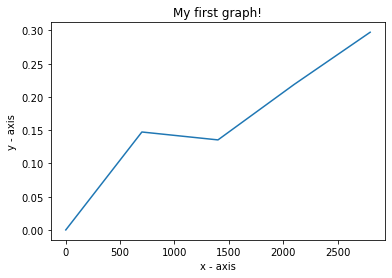

input:
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output:
[[0.92]
 [0.86]
 [0.89]]
Predicted output 
 [[0.894344  ]
 [0.88187507]
 [0.89293124]]


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
X=np.array(([2,9],[1,5],[3,6]),dtype=float)
y=np.array(([92],[86],[89]),dtype=float)
X=X/np.amax(X,axis=0)
y=y/100
def sigmoid(x):
    return 1/(1+np.exp(-x))

def derivatives_sigmoid(x):
    return x*(1-x)
A=[]
B=[]
for i in range(5):
    epoch=700*i
    A.append(epoch) 
    lr=0.1
    inputlayer_neurons=2
    hiddenlayer_neurons=3
    output_neurons=1

    wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
    bh=np.random.uniform(size=(1,hiddenlayer_neurons))
    wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
    bout=np.random.uniform(size=(1,output_neurons))

    start_time=time.time()
    

    for i in range(epoch):
        hinp1=np.dot(X,wh)
        hinp=hinp1+bh
        hlayer_act=sigmoid(hinp)
        outinp1=np.dot(hlayer_act,wout)
        outinp=outinp1+bout
        output=sigmoid(outinp)
        EO=y-output
        outgrad=derivatives_sigmoid(output)
        d_output=EO* outgrad
        EH=d_output.dot(wout.T)
        hiddengrad=derivatives_sigmoid(hlayer_act)
        d_hiddenlayer=EH*hiddengrad
        wout+=hlayer_act.T.dot(d_output)*lr
        bout+=np.sum(d_output,axis=0,keepdims=True)*lr
        wh+=X.T.dot(d_hiddenlayer)*lr
        bh+=np.sum(d_hiddenlayer,axis=0,keepdims=True)*lr
    B.append((time.time() - start_time))

plt.plot(A, B)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('My first graph!')
plt.show()
print("input:\n" + str(X))
print("Actual output:\n" + str(y))
print("Predicted output \n",output)